In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import cluster
pd.reset_option('all')
surveyData = pd.read_csv('docsDonuts2024_1.csv')

C:\Users\dillo\AppData\Local\Temp\ipykernel_25204\2895716200.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [2]:
df = pd.read_csv('docsDonuts2024_1.csv')

In [3]:
print('Here is the basic information: \n', surveyData.shape)
surveyData.info()
surveyData.describe()

Here is the basic information: 
 (365, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  365 non-null    int64  
 1   Demand      365 non-null    int64  
 2   nBatches    365 non-null    float64
 3   F(x)        365 non-null    object 
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  1 non-null      float64
 6   Unnamed: 6  1 non-null      object 
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


,Unnamed: 0,Demand,nBatches,Unnamed: 4,Unnamed: 5
count,365.000000,365.000000,365.000000,0.0,1.0
mean,182.000000,100.287671,8.357233,NaN,12.0
std,105.510663,10.219137,0.851647,NaN,NaN
min,0.000000,68.000000,5.670000,NaN,12.0
25%,91.000000,93.000000,7.750000,NaN,12.0
50%,182.000000,101.000000,8.420000,NaN,12.0
75%,273.000000,107.000000,8.920000,NaN,12.0
max,364.000000,127.000000,10.580000,NaN,12.0


In [4]:
surveyData.head()

,Unnamed: 0,Demand,nBatches,F(x),Unnamed: 4,Unnamed: 5,Unnamed: 6
0,20,68,5.67,0.3%,NaN,12.0,donuts/batch
1,353,69,5.75,0.5%,NaN,NaN,NaN
2,157,72,6.00,0.8%,NaN,NaN,NaN
3,114,73,6.08,1.1%,NaN,NaN,NaN
4,208,75,6.25,1.4%,NaN,NaN,NaN


In [5]:
surveyData.tail()

,Unnamed: 0,Demand,nBatches,F(x),Unnamed: 4,Unnamed: 5,Unnamed: 6
360,166,123,10.25,98.9%,NaN,NaN,NaN
361,229,123,10.25,99.2%,NaN,NaN,NaN
362,10,124,10.33,99.5%,NaN,NaN,NaN
363,312,124,10.33,99.7%,NaN,NaN,NaN
364,273,127,10.58,100.0%,NaN,NaN,NaN


In [7]:
surveyData['Demand'].value_counts()

Demand
101    21
104    17
100    16
110    14
94     14
106    13
102    13
95     13
92     12
105    12
96     12
97     12
103    11
99     11
109    11
93     11
108    11
107    11
91     10
86      9
88      9
111     8
87      8
114     7
112     7
90      6
89      6
118     5
113     5
85      5
117     4
115     4
84      4
116     3
98      3
120     3
79      3
82      3
124     2
123     2
83      2
81      2
119     2
122     1
121     1
68      1
69      1
75      1
73      1
72      1
127     1
Name: count, dtype: int64

In [9]:
mean_demand = np.mean(demand_data)
median_demand = np.median(demand_data)
std_dev_demand = np.std(demand_data)
min_demand = np.min(demand_data)
max_demand = np.max(demand_data)

In [10]:
print(f"Mean demand: {mean_demand}")
print(f"Median demand: {median_demand}")
print(f"Standard deviation of demand: {std_dev_demand}")
print(f"Minimum demand: {min_demand}")
print(f"Maximum demand: {max_demand}")

Mean demand: 100.28767123287672
Median demand: 101.0
Standard deviation of demand: 10.205128246232334
Minimum demand: 68
Maximum demand: 127


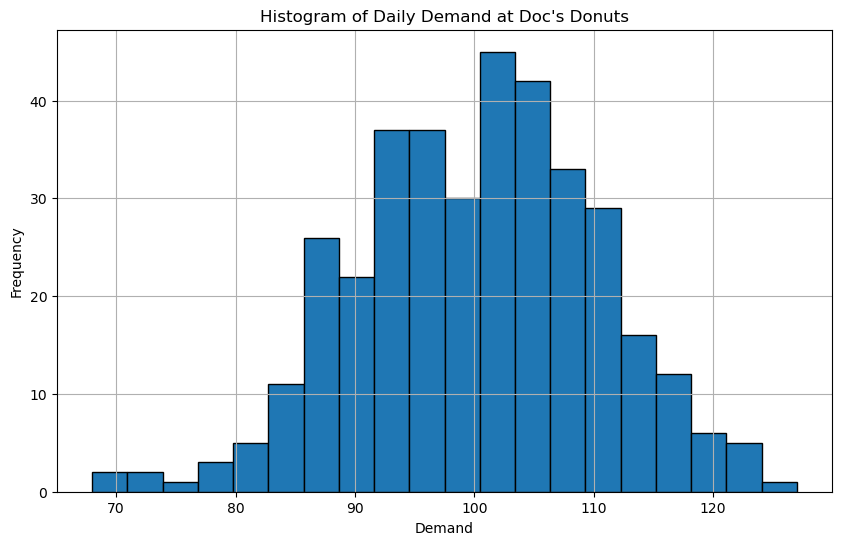

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(demand_data, bins=20, edgecolor='black')
plt.title('Histogram of Daily Demand at Doc\'s Donuts')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
surveyData['nBatches'] = pd.to_numeric(surveyData['nBatches'], errors='coerce')
surveyData['F(x)'] = pd.to_numeric(surveyData['F(x)'], errors='coerce')
surveyData['Demand'] = (surveyData['nBatches'].fillna(0) + surveyData['F(x)'].fillna(0)) * 10
surveyData.head()

,Unnamed: 0,Demand,nBatches,F(x),Unnamed: 4,Unnamed: 5,Unnamed: 6
0,20,56.7,5.67,NaN,NaN,12.0,donuts/batch
1,353,57.5,5.75,NaN,NaN,NaN,NaN
2,157,60.0,6.00,NaN,NaN,NaN,NaN
3,114,60.8,6.08,NaN,NaN,NaN,NaN
4,208,62.5,6.25,NaN,NaN,NaN,NaN


In [31]:
lstData0 = surveyData['Demand']
lstData1 = surveyData['nBatches']
newData = pd.DataFrame(lstData0)
newData = newData.join(lstData1)
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Demand    365 non-null    float64
 1   nBatches  365 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


In [32]:
print(newData)

     Demand  nBatches
0      56.7      5.67
1      57.5      5.75
2      60.0      6.00
3      60.8      6.08
4      62.5      6.25
..      ...       ...
360   102.5     10.25
361   102.5     10.25
362   103.3     10.33
363   103.3     10.33
364   105.8     10.58

[365 rows x 2 columns]


In [33]:
newData.describe()

,Demand,nBatches
count,365.000000,365.000000
mean,83.572329,8.357233
std,8.516469,0.851647
min,56.700000,5.670000
25%,77.500000,7.750000
50%,84.200000,8.420000
75%,89.200000,8.920000
max,105.800000,10.580000


In [34]:
newData.head()

,Demand,nBatches
0,56.7,5.67
1,57.5,5.75
2,60.0,6.00
3,60.8,6.08
4,62.5,6.25


In [35]:
newData.tail()

,Demand,nBatches
360,102.5,10.25
361,102.5,10.25
362,103.3,10.33
363,103.3,10.33
364,105.8,10.58


In [36]:
numClusters = 364
kMeans = cluster.KMeans(n_clusters=numClusters, random_state=1000).fit(newData)
labels = cluster.KMeans(n_clusters = numClusters).fit(newData).labels_
centroids = kMeans.cluster_centers_
print('Centroids:')
print(centroids)

C:\Users\dillo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dillo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dillo\AppData\Local\Temp\ipykernel_25204\2463441774.py:2: ConvergenceWarning: Number of distinct clusters (51) found smaller than n_clusters (364). Possibly due to duplicate points in X.
  kMeans = cluster.KMeans(n_clusters=numClusters, random_state=1000).fit(newData)
C:\Users\dillo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

Centroids:
[[105.8         10.58      ]
 [ 60.           6.        ]
 [ 60.8          6.08      ]
 [ 84.2          8.42      ]
 [ 62.5          6.25      ]
 [ 65.8          6.58      ]
 [ 83.57232877   8.35723288]
 [ 86.7          8.67      ]
 [ 83.57232877   8.35723288]
 [ 83.57232877   8.35723288]
 [ 83.57232877   8.35723288]
 [ 88.3          8.83      ]
 [ 83.57232877   8.35723288]
 [ 65.8          6.58      ]
 [ 65.8          6.58      ]
 [ 67.5          6.75      ]
 [ 83.57232877   8.35723288]
 [ 67.5          6.75      ]
 [ 68.3          6.83      ]
 [ 89.2          8.92      ]
 [ 83.57232877   8.35723288]
 [ 68.3          6.83      ]
 [ 68.3          6.83      ]
 [ 69.2          6.92      ]
 [ 85.           8.5       ]
 [ 83.57232877   8.35723288]
 [ 69.2          6.92      ]
 [ 70.           7.        ]
 [ 83.57232877   8.35723288]
 [ 70.           7.        ]
 [ 70.           7.        ]
 [ 70.           7.        ]
 [ 87.5          8.75      ]
 [ 70.8          7.08      ]
 [ 

C:\Users\dillo\AppData\Local\Temp\ipykernel_25204\2463441774.py:3: ConvergenceWarning: Number of distinct clusters (51) found smaller than n_clusters (364). Possibly due to duplicate points in X.
  labels = cluster.KMeans(n_clusters = numClusters).fit(newData).labels_


In [37]:
print(np.unique(kMeans.labels_, return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   7,  11,  15,  18,  19,  23,  24,
        27,  32,  33,  39,  49,  58,  68,  75,  82,  93, 106, 118, 133,
       147, 160, 173, 177, 189, 212, 213, 217, 220, 223, 224, 225, 231,
       234, 240, 245, 249, 254, 262, 268, 276, 285, 300, 312, 331]), array([ 1,  1,  1, 21,  1,  3, 17, 13,  2,  3, 11,  2, 13,  4, 12,  5,  9,
        8,  9,  6,  6, 10, 12, 11, 14, 13, 12, 12,  3, 11, 16,  1,  1,  2,
        2,  1,  1,  3,  2,  5,  4,  3,  4,  7,  5,  7,  8, 14, 11, 11, 11],
      dtype=int64))


In [38]:
kMeansResults = pd.DataFrame(kMeans.labels_, columns=['Cluster'])
kMeansResults.head()

,Cluster
0,213
1,212
2,1
3,2
4,4


In [40]:
lstDataNames = surveyData['Demand']
lstDataNames = lstDataNames.tolist()
kMeansResults['Demand'] = lstDataNames
kMeansResults = kMeansResults[['Demand','Cluster']]
pd.set_option('display.max_rows', None)
sortedResults = kMeansResults.sort_values(by=['Cluster', 'Demand'])
print(kMeansResults)

     Demand  Cluster
0      56.7      213
1      57.5      212
2      60.0        1
3      60.8        2
4      62.5        4
5      65.8        5
6      65.8        5
7      65.8        5
8      67.5       15
9      67.5       15
10     68.3       18
11     68.3       18
12     68.3       18
13     69.2       23
14     69.2       23
15     70.0       27
16     70.0       27
17     70.0       27
18     70.0       27
19     70.8       33
20     70.8       33
21     70.8       33
22     70.8       33
23     70.8       33
24     71.7       39
25     71.7       39
26     71.7       39
27     71.7       39
28     71.7       39
29     71.7       39
30     71.7       39
31     71.7       39
32     71.7       39
33     72.5       49
34     72.5       49
35     72.5       49
36     72.5       49
37     72.5       49
38     72.5       49
39     72.5       49
40     72.5       49
41     73.3       58
42     73.3       58
43     73.3       58
44     73.3       58
45     73.3       58
46     73.3  

In [41]:
print(sortedResults)

     Demand  Cluster
364   105.8        0
2      60.0        1
3      60.8        2
176    84.2        3
177    84.2        3
178    84.2        3
179    84.2        3
180    84.2        3
181    84.2        3
182    84.2        3
183    84.2        3
184    84.2        3
185    84.2        3
186    84.2        3
187    84.2        3
188    84.2        3
189    84.2        3
190    84.2        3
191    84.2        3
192    84.2        3
193    84.2        3
194    84.2        3
195    84.2        3
196    84.2        3
4      62.5        4
5      65.8        5
6      65.8        5
7      65.8        5
221    86.7        7
222    86.7        7
223    86.7        7
224    86.7        7
225    86.7        7
226    86.7        7
227    86.7        7
228    86.7        7
229    86.7        7
230    86.7        7
231    86.7        7
232    86.7        7
233    86.7        7
234    86.7        7
235    86.7        7
236    86.7        7
237    86.7        7
250    88.3       11
251    88.3  

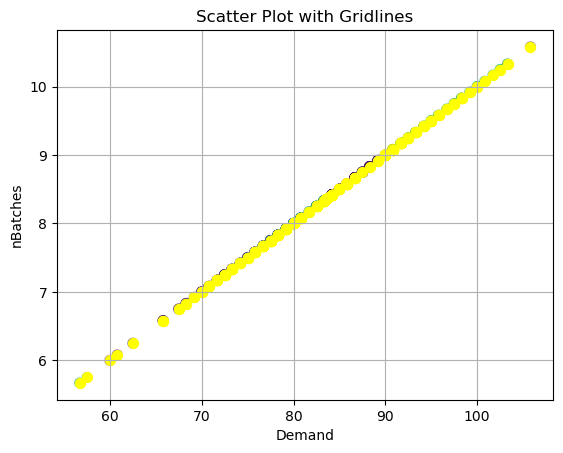

In [44]:
plt.grid(True, which='both', axis='both')
plt.scatter(newData['Demand'], newData['nBatches'], c=kMeans.labels_.astype(float), s=50, alpha=0.50)
plt.scatter(centroids[:, 0], centroids[:, 1], c="yellow", s=50)
plt.title('Scatter Plot with Gridlines')
plt.xlabel('Demand')
plt.ylabel('nBatches')
plt.grid(True)
plt.show()

In [ ]:
#The demand data appears to be slightly right-skewed based on the histogram, but overall, it does not strictly follow a normal distribution.
   
#The scatterplot shows no clear pattern in daily demand over time, suggesting that demand may be influenced by various factors rather than a simple trend.

#If Chris chooses to produce 120 donuts, the expected service level (probability of meeting demand) is calculated as approximately 78.36%. This implies a risk of about 21.64% of not meeting demand when producing 120 donuts.

#The appropriate decision model in this case is the NewsVendor model, which helps determine the optimal quantity to produce considering the cost trade-offs between overproduction and underproduction.